<a href="https://colab.research.google.com/github/Rogerio-mack/SBSI_2024_ts_short_course/blob/main/ex1_a10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# suporte a execução de células em R
%load_ext rpy2.ipython


In [ ]:
%%R
install.packages('fpp2', dependencies = TRUE)

(as ‘lib’ is unspecified)





















































































































































	‘/tmp/Rtmp342pUy/downloaded_packages’



In [ ]:
%%R
library(fpp2)

  method            from
  as.zoo.data.frame zoo 


✔ forecast  8.21.1     ✔ expsmooth 2.3   




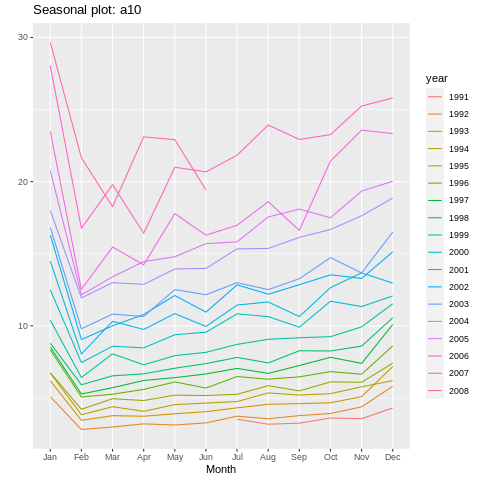

In [ ]:
%%R
autoplot(a10)
ggseasonplot(a10)

In [ ]:
%%R
a10

           Jan       Feb       Mar       Apr       May       Jun       Jul
1991                                                              3.526591
1992  5.088335  2.814520  2.985811  3.204780  3.127578  3.270523  3.737851
1993  6.192068  3.450857  3.772307  3.734303  3.905399  4.049687  4.315566
1994  6.731473  3.841278  4.394076  4.075341  4.540645  4.645615  4.752607
1995  6.749484  4.216067  4.949349  4.823045  5.194754  5.170787  5.256742
1996  8.329452  5.069796  5.262557  5.597126  6.110296  5.689161  6.486849
1997  8.524471  5.277918  5.714303  6.214529  6.411929  6.667716  7.050831
1998  8.798513  5.918261  6.534493  6.675736  7.064201  7.383381  7.813496
1999 10.391416  6.421535  8.062619  7.297739  7.936916  8.165323  8.717420
2000 12.511462  7.457199  8.591191  8.474000  9.386803  9.560399 10.834295
2001 14.497581  8.049275 10.312891  9.753358 10.850382  9.961719 11.443601
2002 16.300269  9.053485 10.002449 10.788750 12.106705 10.954101 12.844566
2003 16.828350  9.800215 

In [ ]:
# prompt: Como gerar um .csv a partir de um dataframe em R?

%%R
write.csv(a10, "a10.csv")


In [ ]:
import pandas as pd

df = pd.read_csv("/content/a10.csv",usecols=['x'])
df.columns = ['a10']
df['date'] = pd.date_range(start='1991-07-01', end='2008-06-30', freq='M')
df = df[['date','a10']]
df.head()

,date,a10
0,1991-07-31,3.526591
1,1991-08-31,3.180891
2,1991-09-30,3.252221
3,1991-10-31,3.611003
4,1991-11-30,3.565869


In [ ]:
df.to_csv('a10.csv',index=None)

In [ ]:
df = pd.read_csv('https://github.com/Introducao-Series-Temporais-em-Python/Book/raw/main/Data/a10.csv')
df.head()

,date,a10
0,1991-07-31,3.526591
1,1991-08-31,3.180891
2,1991-09-30,3.252221
3,1991-10-31,3.611003
4,1991-11-30,3.565869


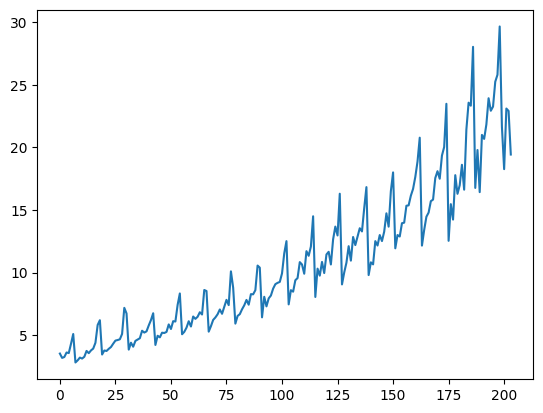

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df.a10)
plt.show()

In [ ]:
# prompt: Crie no dataframe a10 um date index iniciando em Julho de 1991 e encerrando em Junho de 2008.

# df.index = pd.date_range(start='1991-07-01', end='2008-06-30', freq='M')
df['date'] = pd.to_datetime(df['date'])
df = df.set_index(df['date'],drop=True)
df = df.drop(columns='date')
df.head()

,a10
date,
1991-07-31,3.526591
1991-08-31,3.180891
1991-09-30,3.252221
1991-10-31,3.611003
1991-11-30,3.565869


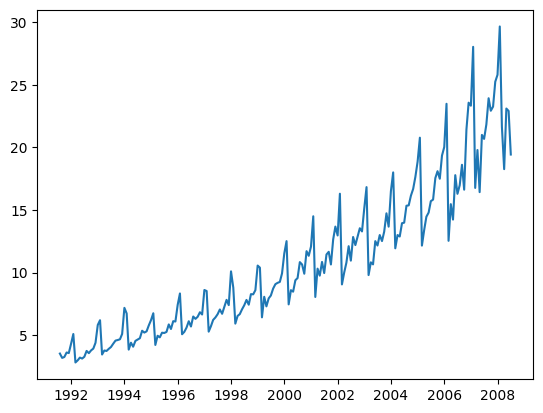

In [ ]:
plt.plot(df.a10)
plt.show()

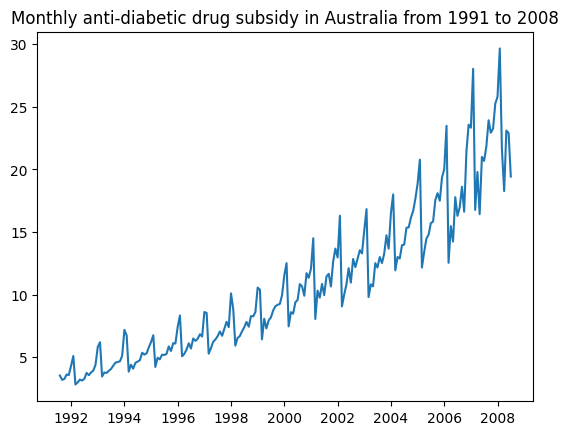

In [ ]:
plt.plot(df.a10)
plt.title("Monthly anti-diabetic drug subsidy in Australia from 1991 to 2008")
plt.show()

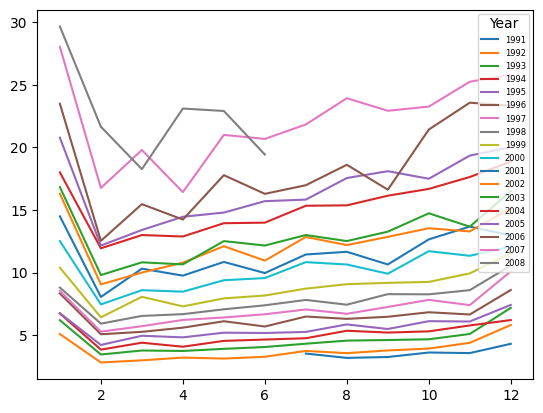

In [ ]:
for y in df.index.year.unique():
  plt.plot(df[ df.index.year == y ].index.month,df[ df.index.year == y ].a10,label=y)

plt.legend(title='Year',fontsize=6,loc='upper right')
plt.show()

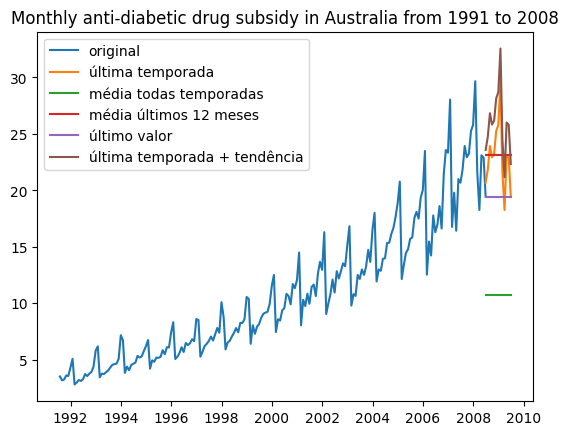

In [ ]:
import numpy as np

plt.plot(df.a10, label='original')

time_forecast = pd.date_range(start='2008-06-30', end='2009-06-30', freq='M')

plt.plot(time_forecast,
         df.loc[pd.date_range(start='2007-06-30', end='2008-06-30', freq='M')].a10, label='última temporada')

plt.plot(time_forecast,
         np.ones(len(time_forecast))*df.a10.mean(), label='média todas temporadas')

plt.plot(time_forecast,
         np.ones(len(time_forecast))*df[-12::].a10.mean(), label='média últimos 12 meses')

plt.plot(time_forecast,
         np.ones(len(time_forecast))*df[-1::].a10.mean(), label='último valor')

plt.plot(time_forecast,
         df.loc[pd.date_range(start='2007-06-30', end='2008-06-30', freq='M')].a10 +
         np.ones(len(time_forecast))*( df[-12::].a10.values - df[-24:-12].a10.values ).mean(),
         label='última temporada + tendência')

plt.legend()

plt.title("Monthly anti-diabetic drug subsidy in Australia from 1991 to 2008")
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
ADF_result = adfuller(df)

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: 3.14518568930673
p-value: 1.0


In [ ]:
ADF_result = adfuller(df.diff().dropna())

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -2.4951721474497393
p-value: 0.11665341686468789


In [ ]:
ADF_result = adfuller(df.diff().diff().dropna())

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -10.29230470651732
p-value: 3.543916358529341e-18


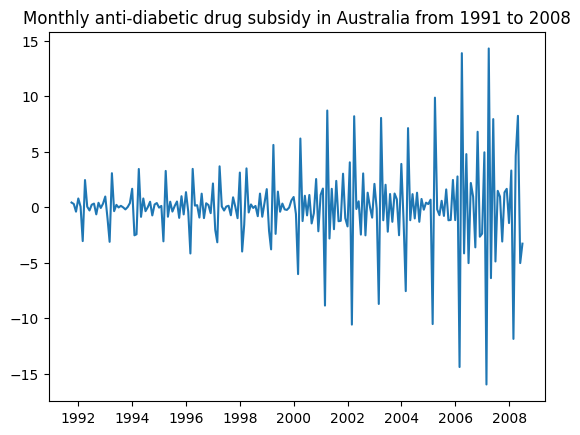

In [ ]:
plt.plot(df.a10.diff().diff())
plt.title("Monthly anti-diabetic drug subsidy in Australia from 1991 to 2008")
plt.show()

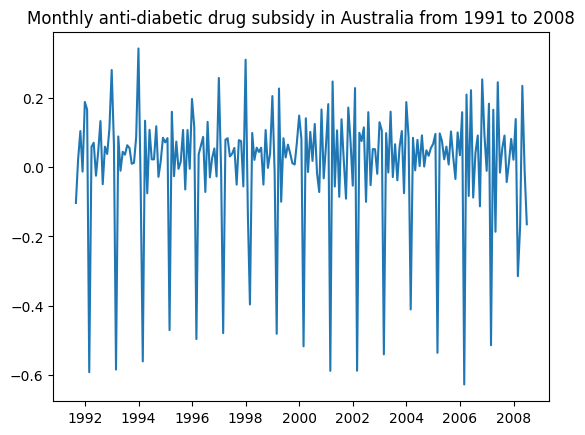

In [ ]:
plt.plot(df.apply(lambda x: np.log(x)).diff())
plt.title("Monthly anti-diabetic drug subsidy in Australia from 1991 to 2008")
plt.show()

In [ ]:
ADF_result = adfuller(df.apply(lambda x: np.log(x)).diff().dropna())

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -4.51943242629711
p-value: 0.00018133843740901967


In [ ]:
df_season = df.apply(lambda x: np.log(x)).diff().dropna()
df_season

,a10
date,
1991-08-31,-0.103170
1991-09-30,0.022177
1991-10-31,0.104647
1991-11-30,-0.012578
1991-12-31,0.188688
...,...
2008-02-29,-0.314777
2008-03-31,-0.170220
2008-04-30,0.235181


In [ ]:
df_monthly = df_season.groupby(df_season.index.month).mean()
df_monthly

,a10
date,
1,0.086318
2,-0.511802
3,0.109576
4,0.002967
5,0.088768
6,-0.015346
7,0.076921
8,0.014133
9,0.005635


In [ ]:
df_monthly.loc[1]

a10    14.171518
Name: 1, dtype: float64

In [ ]:
df_monthly.loc[m].values[0]

10.222275678823529

In [ ]:
df_monthly_ys = df_season.copy()
month_values = [ ]

for m in df_monthly_ys.index.month:
  month_values.append(df_monthly.loc[m].values[0])

df_monthly_ys['month_value'] = month_values
df_monthly_ys.head()

,a10,month_value
date,,
1991-08-31,-0.103170,0.014133
1991-09-30,0.022177,0.005635
1991-10-31,0.104647,0.069537
1991-11-30,-0.012578,0.034163
1991-12-31,0.188688,0.144042


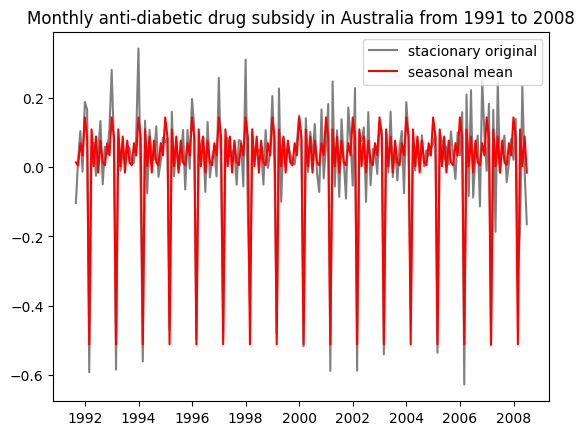

In [ ]:
plt.plot(df_season.a10,'k-',label='stacionary original',alpha=0.5)
plt.plot(df_monthly_ys.month_value,'r',label='seasonal mean')
plt.title("Monthly anti-diabetic drug subsidy in Australia from 1991 to 2008")
plt.legend()
plt.show()

In [ ]:
df.iloc[0]

a10    3.526591
Name: 1991-07-31 00:00:00, dtype: float64

In [ ]:
df_monthly_ys.head()

,a10,month_value
date,,
1991-08-31,-0.103170,0.014133
1991-09-30,0.022177,0.005635
1991-10-31,0.104647,0.069537
1991-11-30,-0.012578,0.034163
1991-12-31,0.188688,0.144042


In [ ]:
# df_monthly_ys.at[pd.to_datetime('1991-08-31'),'month_value'] = df_monthly_ys.at[pd.to_datetime('1991-08-31'),'month_value'] + df.iloc[0].values[0]

In [ ]:
df_monthly_ys.at[pd.to_datetime('1991-08-31'),'month_value'] = np.log(df.iloc[0].values[0])

In [ ]:
df_monthly_ys.tail()

,a10,month_value
date,,
2008-02-29,-0.314777,-0.511802
2008-03-31,-0.170220,0.109576
2008-04-30,0.235181,0.002967
2008-05-31,-0.008482,0.088768
2008-06-30,-0.164775,-0.015346


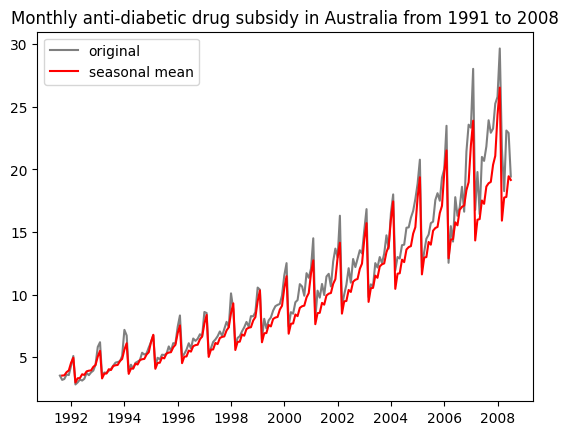

In [ ]:
plt.plot(df.a10,'k-',label='original',alpha=0.5)
plt.plot(np.exp(df_monthly_ys.month_value.cumsum()),'r',label='seasonal mean')
plt.title("Monthly anti-diabetic drug subsidy in Australia from 1991 to 2008")
plt.legend()
plt.show()

In [ ]:
np.exp(df_monthly_ys.month_value).cumsum()

date
1991-08-31      1.014234
1991-09-30      2.019884
1991-10-31      3.091895
1991-11-30      4.126649
1991-12-31      5.281581
                 ...    
2008-02-29    202.930832
2008-03-31    204.046637
2008-04-30    205.049609
2008-05-31    206.142436
2008-06-30    207.127207
Name: month_value, Length: 203, dtype: float64